In [ ]:
#1- What is the main difference between simple and multiple linear regression?

# The main difference between simple linear regression and multiple linear regression is the number of independent variables used.
#Simple linear regression uses only one independent variable
#to predict the value of a dependent variable while multiple #linear regression uses two or more independent variables

In [ ]:
#2- How do you evaluate th performance of a linear regression model?

#There are several commonly used evaluation metrics for linear regression models. Here are some of the key ones
#1.Mean squared error(MSE)
#2.Root Mean Squared error(RMSE)
#3.R-squared (R²)
#4.Mean Absolute Error





In [ ]:
#4-What is the purpose of regularization in linear regression? How does L1 regularization differ from L2 regularization?

#The purpose of regularization is to prevent overfitting and improve model generalization
#L1 and L2 regularization are two common techniques for regularization:
#L1 regularization is most effective for enabling feature selection and maintaining model interpretability, while L2 regularization is effective for handling multicollinearity and prioritizing model accuracy and stability

In [ ]:
###Logistic Regression

In [ ]:
#Logistic regression is used for classification tasks where the output is categorical (e.g., binary outcomes like 0/1),
#while linear regression is for regression tasks with continuous outputs. Logistic regression predicts probabilities and applies a threshold for classification, while linear regression directly predicts numerical values
#Logistic regression uses a sigmoid function to model the relationship, whereas linear regression assumes a linear relationship between variables


In [ ]:
#2-What is the sigmoid function, and why is it used in logistic regression?
#The sigmoid function is a mathematical function which maps any real-valued number into a range between 0 and 1.
#It is used for probability mapping and classification threshold.

In [ ]:
#3- What is multicollinearity problem and how you solve the multicollinearity problem ?
#Multicollinearity occurs when two or more independent variables in a regression model are highly correlated, meaning they contain redundant information.
#How to Solve the Multicollinearity Problem:
#Remove Highly Correlated Predictors
#Combine Predictors
#Regularization

In [ ]:
#Decision Trees

In [ ]:
#1- How does a decision tree algorithm work, and how does it make predictions?

In [ ]:
#A decision tree algorithm works by recursively splitting the dataset into subsets based on feature values to maximize homogeneity within each subset. At each node, it selects the feature and threshold that result in the best split, typically using criteria like Gini Impurity, Entropy, or Mean Squared Error.

#To make predictions:

#For classification, the algorithm assigns the majority class of the leaf node where the input data falls.

#For regression, it predicts the mean value of the target variable in the leaf node.

#The tree structure ensures predictions are made by traversing from the root to a leaf node based on the feature values of the input data.

In [ ]:
#2- What are the criteria used to split a node in a decision tree (e.g., Gini impurity, Information Gain)?

# Gini Impurity: Measures the likelihood of a randomly chosen element being misclassified in a dataset.

# Information Gain (based on Entropy): Measures the reduction in entropy after a split.

# Mean Squared Error (MSE) (for regression): Measures variance reduction

In [ ]:
#3- What is overfitting in decision trees, and how can it be prevented?
#Overfitting in decision tree means that the model favours a feature more than other features so the prediction made is biased or in favour of that feature which can reduce the accuracy of our model.
#How can it be prevented:
#Pruning
#Restrict Tree Depth
#Regularization Parameters

In [ ]:
#4- How do you decide the maximum depth of a decision tree?
#Set the maximum depth based on cross-validation to balance bias and variance, or by considering domain knowledge and dataset size

In [ ]:
#Ensemble Techniques

In [ ]:
#1- What is an ensemble learning technique, and why is it used in machine learning?
#Ensemble learning combines predictions from multiple models (e.g., decision trees) to improve accuracy, robustness, and generalization compared to individual models.


In [ ]:
#2- What is bootstrap=True in Ensemble technique ?

#It enables sampling with replacement, allowing the creation of multiple datasets from the original data for training models

In [ ]:
#3- What is pasting ?

#Pasting is a technique similar to Bagging, but it involves sampling without replacement, ensuring no duplicate samples in the training subsets.

In [ ]:
#4- What is OOB method ?

#OOB is a validation method in Bagging where predictions for a sample are made using only the models trained on data subsets that do not include that sample

In [ ]:
# Model Creation

In [ ]:
#Create a Linear Regression model and apply regularization using the dataset from this
#link. Ensure that both Lasso and Ridge regularization are used, and perform feature selection using VIF.
#Follow the same process as before, including handling null values, removing duplicate rows, and performing necessary data visualization and plotting.
#Link -
#https://raw.githubusercontent.com/s4sauravv/Datasets/refs/heads/main/Admission_Prediction.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error

In [5]:
url = "https://raw.githubusercontent.com/s4sauravv/Datasets/refs/heads/main/Admission_Prediction.csv"
data_ad = pd.read_csv(url)

data_ad

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,497,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,498,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,499,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73


In [6]:
data_ad.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [7]:
data_ad.shape

(500, 9)

In [8]:
#Now we Delete the unwanted columns
data_ad.drop(columns=['Serial No.'],inplace=True)

In [9]:
data_ad.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [10]:
#use mean for continuous feature
data_ad['GRE Score']=data_ad['GRE Score'].fillna(data_ad['GRE Score'].mean())
data_ad['TOEFL Score']=data_ad['TOEFL Score'].fillna(data_ad['TOEFL Score'].mean())

#use mode for categorical feature
data_ad['University Rating']=data_ad['University Rating'].fillna(data_ad['University Rating'].mode()[0])

In [11]:
data_ad.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


In [12]:
#check to see if null values are filled
data_ad.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


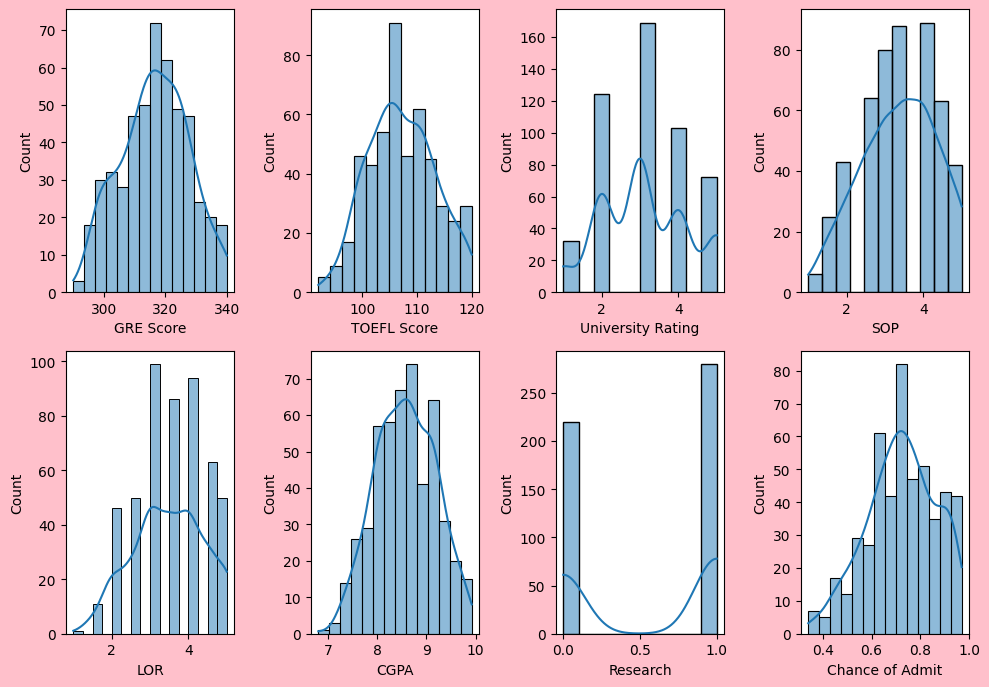

In [13]:
plt.figure(figsize=(10,7), facecolor='pink')
plotnumber=1
for column in data_ad:
    if plotnumber<=8:
        axs=plt.subplot(2,4,plotnumber)
        #ax=axs: This specifies the axes (axs) of the subplot where the plot will be drawn.
        #kde=True: This argument adds a Kernel Density Estimate (KDE) curve to the histogram.
        sns.histplot(data_ad[column], ax=axs, kde=True)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

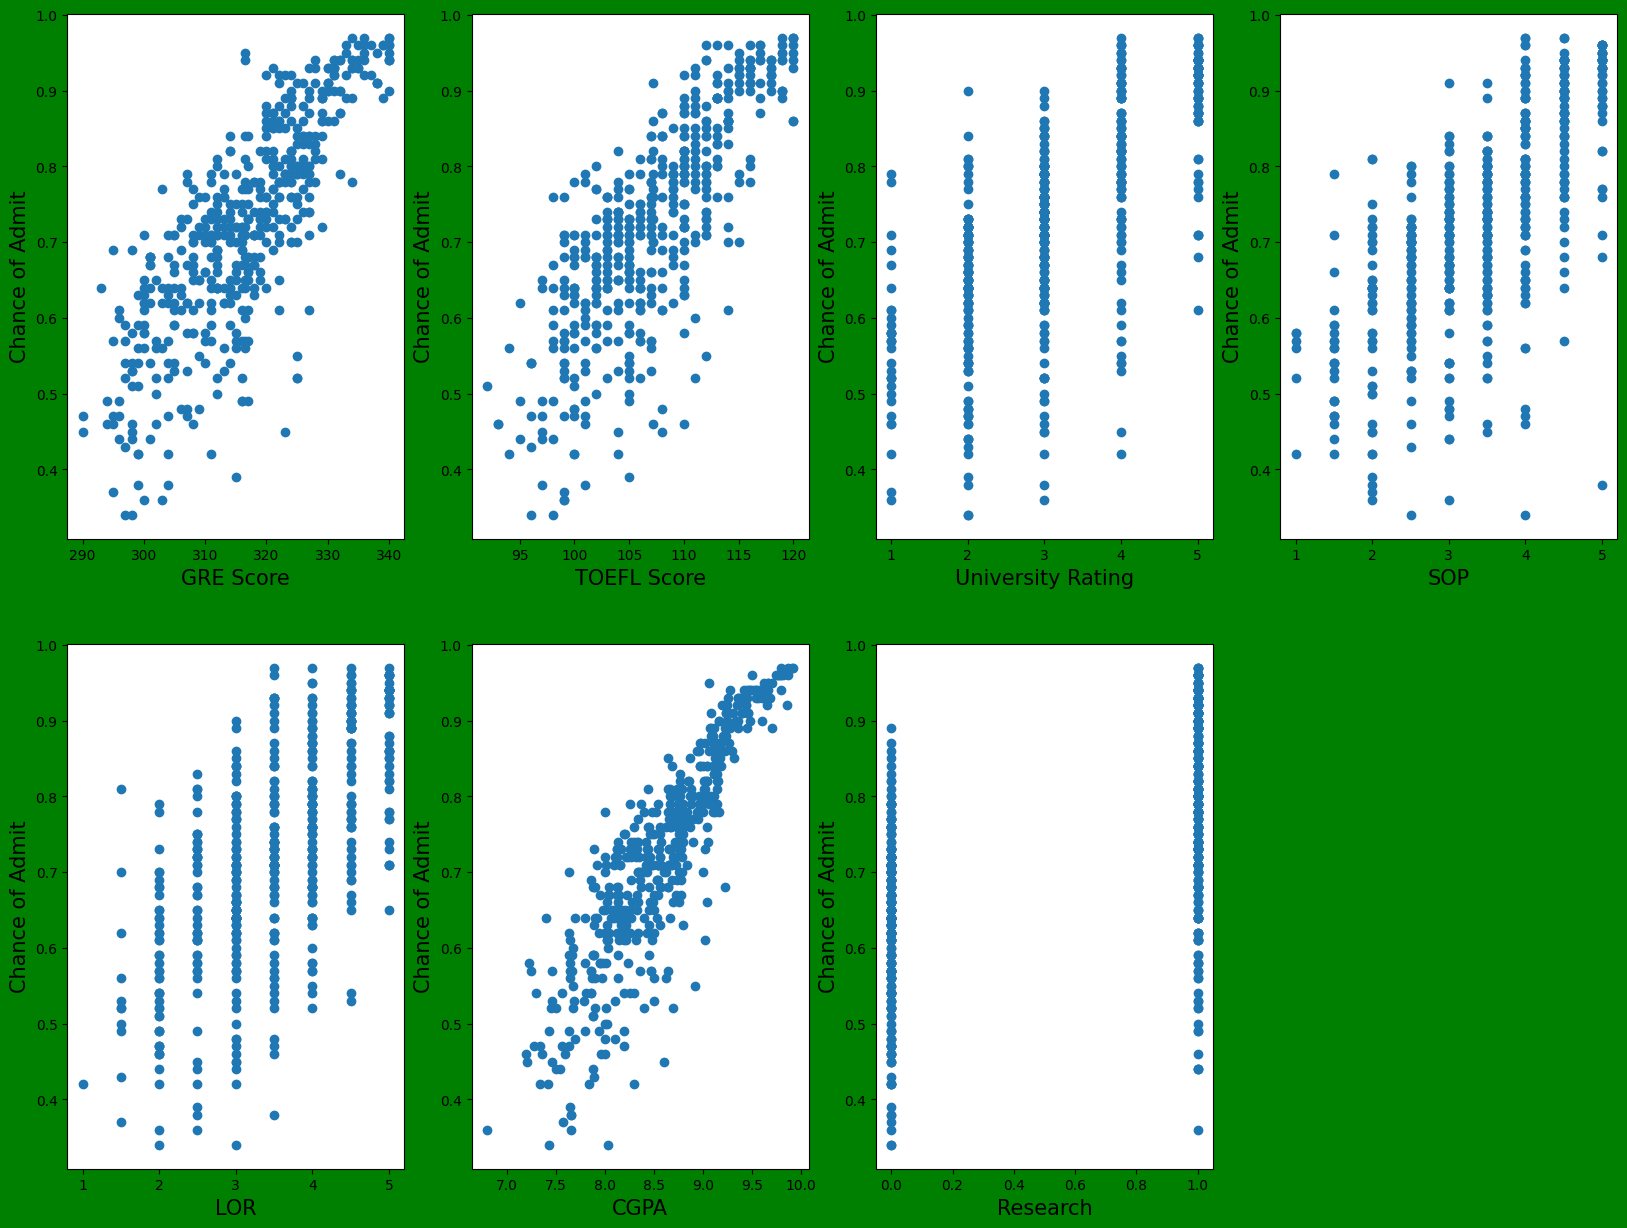

In [14]:
#plot a graph with features vs label

y=data_ad['Chance of Admit']
x=data_ad.drop(columns=['Chance of Admit'])

plt.figure(figsize=(20,15),facecolor='green')
plotnumber=1
for column in x:
    if plotnumber<=8:
        axs=plt.subplot(2,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=15)
        plt.ylabel('Chance of Admit',fontsize=15)
    plotnumber+=1
plt.show()

In [15]:
#now we standardise the data

scaler=StandardScaler()

In [16]:
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 1.84274116e+00,  1.78854223e+00,  7.82009548e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.82009548e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.04622593e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66864169e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.82009548e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.82009548e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

In [17]:
#Now do Train test split

xtrain,xtest,ytrain,ytest=train_test_split(x_scaled,y, test_size=0.20, random_state=0)

In [18]:

#create a linear regression model

model=LinearRegression()

In [19]:
xtrain.shape

(400, 7)

In [20]:

#train the machine learning model using the training data.

model.fit(xtrain,ytrain)

LinearRegression()

In [21]:
#Check with one data how good is our model
data_ad.tail(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
498,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73
499,327.0,113.0,4.0,4.5,4.5,9.04,0,0.84


In [22]:
#transform so that input is on same scale as data used
model.predict(scaler.transform([[316.471774,103.0,4.0,4.0,5.0,8.43,0]]))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0.71484877])

In [23]:
#Now check How good is our model
trainscore=model.score(xtrain,ytrain)
print(trainscore)

0.8319991275688701


In [24]:
testscore=model.score(xtest,ytest)
print(testscore)

0.7588343236564545


In [25]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [26]:
#Its give us it good and model we made is also good
import numpy as np

# Make predictions on the test data
y_pred = model.predict(xtest)

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(ytest, y_pred)

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(ytest, y_pred)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

# Print results
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 0.04916703783447363
MSE: 0.004211898245920936
RMSE: 0.06489913902295573


In [27]:
#Regularization

In [28]:
#Lasso

In [29]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

#LASSOCV will return best alpha after max iteration
#normalize is subtracting the mean and divide by L2_norm


lasscv=LassoCV(alphas = None , max_iter =100)
lasscv.fit(xtrain,ytrain)

LassoCV(max_iter=100)

In [30]:
alpha=lasscv.alpha_
print(alpha)

0.0008381836085067159


In [31]:

lasso_reg=Lasso(alpha)
lasso_reg.fit(xtrain,ytrain)


Lasso(alpha=0.0008381836085067159)

In [32]:
lasso_reg.score(xtest,ytest)

0.7603246640960799

In [33]:
#RIDGE

In [34]:
ridgecv=RidgeCV(alphas =np.arange(0.001,0.1,0.01))
ridgecv.fit(xtrain,ytrain)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

In [35]:
#normalize

#best alpha paremetere
alpha=ridgecv.alpha_
print(alpha)

0.09099999999999998


In [36]:
lasso_reg=Ridge(alpha)
lasso_reg.fit(xtrain,ytrain)


Ridge(alpha=0.09099999999999998)

In [37]:

lasso_reg.score(xtest,ytest)

0.758828095571862

In [38]:

x_scaled.shape

(500, 7)

In [40]:
#Finding Variance inflation factor is each scaled column i.e x_scaled.shape[1] (1/(1=R2))
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]

vif['Features']=x.columns


#Lets Check the Values
vif

,vif,Features
0,4.152735,GRE Score
1,3.793345,TOEFL Score
2,2.517272,University Rating
3,2.776393,SOP
4,2.037449,LOR
5,4.654369,CGPA
6,1.459411,Research


In [41]:
xtrain,xtest,ytrain,ytest=train_test_split(x_scaled,y, test_size=0.20, random_state=0)

In [42]:
model=LinearRegression()

In [43]:
model.fit(xtrain,ytrain)

LinearRegression()

In [44]:
y_pred=model.predict(xtest)
y_pred

array([0.65924578, 0.83392947, 0.7784012 , 0.88088697, 0.60151248,
       0.64303018, 0.52949081, 0.72541524, 0.52331114, 0.7471505 ,
       0.6102711 , 0.70960719, 0.62145427, 0.75327001, 0.88510033,
       0.5081327 , 0.8247222 , 0.64765362, 0.76562222, 0.53102853,
       0.51379982, 0.72320889, 0.51865025, 0.92261104, 0.82250014,
       0.73733786, 0.69792288, 0.50701392, 0.5813527 , 0.59499342,
       0.72691372, 0.48310316, 0.68668227, 0.8424367 , 0.56268178,
       0.59737057, 0.84546016, 0.86806488, 0.58960299, 0.65930754,
       0.66840843, 0.90325365, 0.86629714, 0.72092358, 0.77329078,
       0.80782931, 0.97139959, 0.85088172, 0.65645073, 0.65408543,
       0.63095562, 0.63639365, 0.61201303, 0.80092481, 0.69468954,
       0.83156483, 0.52342254, 0.86333515, 0.59898547, 0.6354385 ,
       0.49770544, 0.90852825, 0.61786923, 0.94766444, 0.71892676,
       0.61470517, 0.73625361, 0.84421023, 0.51857903, 0.77780718,
       0.89639382, 0.78369433, 0.69729865, 0.63930646, 0.78367

In [45]:
mae = mean_absolute_error(ytest, y_pred)
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)

# Print the results
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")


MAE: 0.04916703783447363
MSE: 0.004211898245920936
RMSE: 0.06489913902295573
